In [1]:
import pandas as pd
import configparser
import matplotlib.pyplot as plt
%matplotlib inline

from Wrapper import *

## CSV

### Read json file

The wrapper obj reads the "input.json" which contains parameters for manipulating the data and running the different models on it.

In [ ]:
obj = Wrapper()
obj.read_json(file_name='input.json')

# Dumps output to "results" folder
obj.write_json()

### Search

The wrapper obj read the "input.json" which contains parameters for manipulating the data and in addition to running different models, it also tries different time features (year, month, week, dow, tod) & resampling frequencies (15min, hour, day) and finds the optimal model.

In [ ]:
obj = Wrapper()
obj.search(file_name='input.json')

# Dumps output to "results" folder
obj.write_json()

### Progressive

This is the recommended way to use the library. In this case, instead of filling all the arguments in a single json file, you can run each function and check if it returns correct data before moving on to the next function.

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


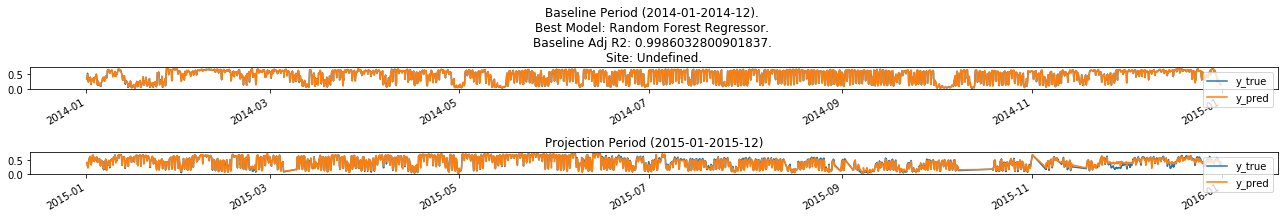

In [2]:
# Custom function: Can use this function if user wants to test how a particular model performs against the others.
def func(X, y):
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import cross_val_score
    model = LinearRegression()
    model.fit(X, y)
    return model.predict(X)

obj = Wrapper()

imported_data = obj.import_data(folder_name='../data/', head_row=[5,5,0], save_file=False)

cleaned_data = obj.clean_data(imported_data, 
                              resampler='max',
                              high_bound=9998,
                              rename_col=['OAT','RelHum_Avg', 'CHW_Elec', 'Elec', 'Gas', 'HW_Heat'],
                              drop_col='Elec',
                              save_file=False)

preprocessed_data = obj.preprocess_data(cleaned_data, week=True, tod=True, normalize=True, save_file=False)

obj.model(preprocessed_data, dep_col='HW_Heat', alphas=np.logspace(-4,1,5), figsize=(18,5),
          cv=5,
          baseline_period=["2014-01","2014-12"], 
          projection_period=["2015-01","2015-12", "2016-01","2016-12"],
          exclude_time_period=[],
          custom_model_func=func)

# Dumps output to "results" folder
obj.write_json()

## MDAL

Sample code to get data from MDAL. Once you have the imported_data, you can use the above "Progressive" method to clean, pre-process and run models on it.

In [ ]:
site = "south-berkeley-senior-center"
start = '2018-09-01T00:00:00Z'
end = '2018-11-19T00:00:00Z'

In [ ]:
mdal_obj = Import_MDAL()
result = mdal_obj.get_meter(site=site, start=start, end=end, var='meter', agg='RAW', 
                            window=None, aligned=True, return_names=True)
imported_data = result.df
imported_data.head()